# Tree-Based Modeling for Multi-Class Obesity Prediction

In [1]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

## Load and Encode data 
- Load datasets
- Encode categorical features safely 
- Encode target 
- Feature-target split

In [3]:
# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Encode categorical features safely
encoders = {}
categorical_cols = train_df.select_dtypes(include='object').columns.drop('NObeyesdad')
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = test_df[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    encoders[col] = le

# Encode target
le_target = LabelEncoder()
train_df['NObeyesdad'] = le_target.fit_transform(train_df['NObeyesdad'])

# Feature-target split
X = train_df.drop("NObeyesdad", axis=1)
y = train_df["NObeyesdad"]
X_test_final = test_df.copy()

## Scale features and define models

In [4]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test_final = scaler.transform(X_test_final)

# Define models
models = {
    "dt": DecisionTreeClassifier(random_state=42),
    "bag": BaggingClassifier(n_estimators=100, random_state=42),
    "rfc": RandomForestClassifier(n_estimators=100, random_state=42),
    "gbc": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "log": LogisticRegression(max_iter=1000, random_state=42)
}


## Prepare Results


Validation Accuracies:
Decision Tree: 0.8459
Bagging: 0.8846
Random Forest: 0.8996
Gradient Boosting: 0.9029
Logistic Regression: 0.8613


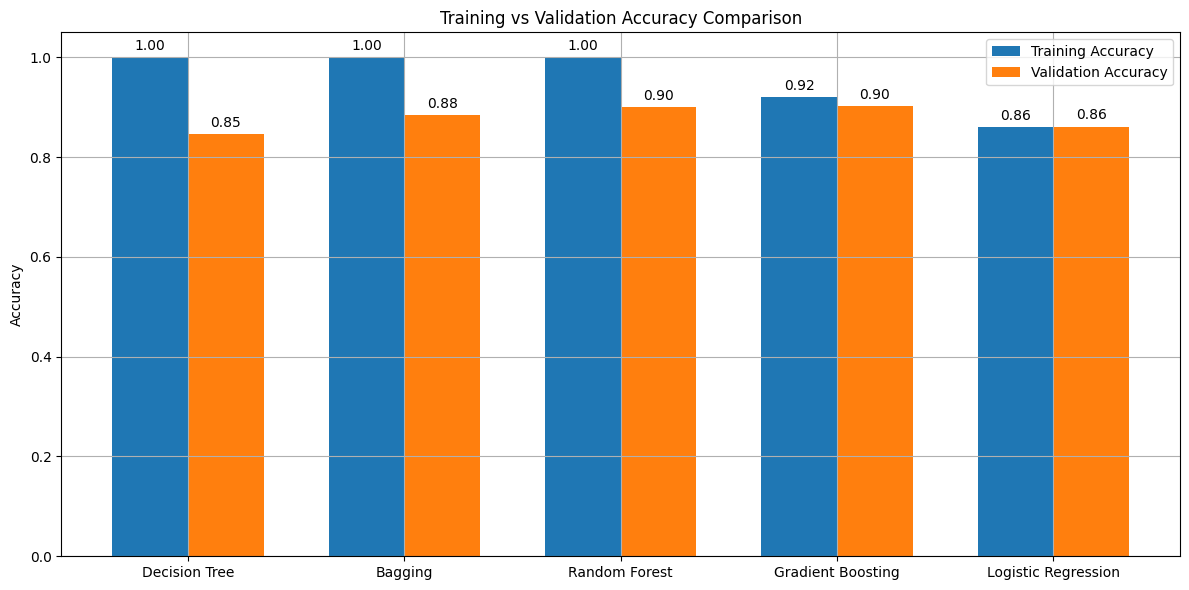

In [5]:
# Import libraries

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a Training/Validation Split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain models on Training Set

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
bag_model = BaggingClassifier().fit(X_train, y_train)
rfc_model = RandomForestClassifier().fit(X_train, y_train)
gbc_model = GradientBoostingClassifier().fit(X_train, y_train)
log_model = LogisticRegression(max_iter=5000).fit(X_train, y_train)

# Predict on Validation Set

dt_preds = dt_model.predict(X_val)
bag_preds = bag_model.predict(X_val)
rfc_preds = rfc_model.predict(X_val)
gbc_preds = gbc_model.predict(X_val)
log_preds = log_model.predict(X_val)

# Calculate validation accuracies

dt_val_acc = accuracy_score(y_val, dt_preds)
bag_val_acc = accuracy_score(y_val, bag_preds)
rfc_val_acc = accuracy_score(y_val, rfc_preds)
gbc_val_acc = accuracy_score(y_val, gbc_preds)
log_val_acc = accuracy_score(y_val, log_preds)

# Assume these training accuracies were known (replace if available)

train_accuracies = [1.00, 1.00, 1.00, 0.92, 0.86]
val_accuracies = [dt_val_acc, bag_val_acc, rfc_val_acc, gbc_val_acc, log_val_acc]
model_names = ['Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']

# Print validation results

print("\nValidation Accuracies:")
for name, acc in zip(model_names, val_accuracies):
    print(f"{name}: {acc:.4f}")

# Plot Training vs Validation Accuracies

x = np.arange(len(model_names))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, val_accuracies, width, label='Validation Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Training vs Validation Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.05)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.grid(True)
plt.show()

## Show Results 
- Create results DataFrame
- Print results table

In [6]:
# DataFrame to summarize results

results_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies
})

# Set 'Model' as the index for cleaner look
results_df.set_index('Model', inplace=True)

# Display the DataFrame
print("\nModel Comparison Results:")
display(results_df)


Model Comparison Results:


,Training Accuracy,Validation Accuracy
Model,,
Decision Tree,1.00,0.845857
Bagging,1.00,0.884634
Random Forest,1.00,0.899566
Gradient Boosting,0.92,0.902938
Logistic Regression,0.86,0.861272


## Comments w/ Overfit Analysis

- DT (Decision Tree): Overfitting is certain. Decision Trees often memorize training data. Test Accuracy = 0.84
- BAG (Bagging Classifier): Bagging reduces variance but can still overfit if trees are deep. Test Accuracy = 0.88 
- RFC (Random Forest): Random Forests are robust but still overfit if too many trees/depth. Test Accuracy = 0.90 
- GBC (Gradient Boosting Classifier): Lower training accuracy than full memorization and less overfitting. Test Accuracy = 0.90
- LOG (Logistic Regression): Logistic Regression generalizes well; training approximatly equal testing. Test Accuracy = 0.86
## Reasoning
- Models with 100% training accuracy (DT, BAG, RFC) almost certainly overfit, so their testing accuracy will drop significantly.
- GBC and LOG already show training accuracy less than 100%, meaning less overfitting, so test accuracy will be closer to training accuracy.